<a href="https://colab.research.google.com/github/zainbabur/customer_churn_analysis/blob/master/Churn_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2019-10-11 01:22:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  --.-KB/s    in 0.01s   

2019-10-11 01:22:41 (2.77 MB/s) - ‘ChurnData.csv’ saved [36144/36144]



In [0]:
import numpy as np
import pandas as pd

In [0]:
telco_data = pd.read_csv("ChurnData.csv")
telco_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [0]:
telco_data.describe()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.0000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,13.240000,15.783250,14.358750,12.2170,577.770750,507.007500,650.663750,0.295000,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,15.643842,19.557103,14.781269,21.6326,746.608653,820.027858,941.470689,0.457187,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,0.000000,0.000000,0.000000,0.0000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,0.000000,0.000000,0.000000,0.0000,79.337500,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,0.000000,0.000000,12.500000,0.0000,289.525000,0.000000,342.500000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,24.750000,33.012500,20.750000,23.4625,806.762500,724.162500,921.250000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,68.500000,63.250000,109.250000,109.7000,4333.000000,4938.600000,7515.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
df_test = telco_data[['custcat', 'churn']]
df_grp = df_test.groupby('custcat').count()
#sns.scatterplot(df_grp, telco_data.custcat)

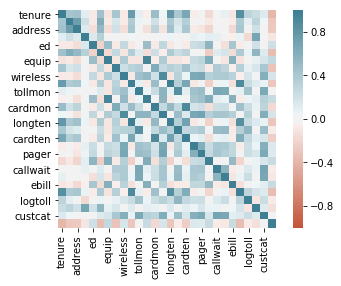

In [0]:
corr = telco_data.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),square=True)


In [0]:
telco_data.isnull().sum()

tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [0]:
X = telco_data.drop("churn", axis = 1)
Y = telco_data.churn

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)

In [0]:
xtrain.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
174,3.0,32.0,4.0,58.0,2.0,11.0,1.0,1.0,1.0,2.75,15.75,29.50,9.25,28.55,5.70,49.65,15.0,1.0,1.0,0.0,0.0,0.0,1.0,1.012,2.757,4.060,4.0
46,28.0,57.0,33.0,82.0,4.0,22.0,1.0,0.0,0.0,4.05,0.00,31.45,0.00,0.00,71.50,0.00,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.399,3.240,4.407,2.0
101,20.0,32.0,10.0,19.0,3.0,5.0,1.0,0.0,0.0,6.85,0.00,36.05,0.00,0.00,106.50,0.00,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.924,3.240,2.944,2.0
56,12.0,64.0,13.0,9.0,2.0,6.0,1.0,1.0,0.0,3.80,30.00,32.80,8.50,0.00,52.85,317.75,95.0,0.0,0.0,1.0,1.0,1.0,1.0,1.335,3.401,2.197,3.0
102,34.0,63.0,10.0,23.0,2.0,0.0,1.0,1.0,1.0,14.30,19.50,39.60,15.25,28.95,459.05,616.50,495.0,1.0,1.0,1.0,1.0,1.0,1.0,2.660,2.970,3.135,4.0


# Decision Tree



In [0]:
from sklearn.tree import DecisionTreeClassifier as dtc  
from sklearn import metrics

In [0]:
def get_mae(X_train, y_train, X_test, y_test, max_leaf_nodes):
  mae_dict = {}
  acc_dict = {}
  for leaf_nodes in max_leaf_nodes:
    model = dtc(max_leaf_nodes = leaf_nodes)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = metrics.mean_absolute_error(predictions, y_test)
    mae_dict[leaf_nodes] = mae
    accuracy = metrics.accuracy_score(y_test, predictions)
    acc_dict[leaf_nodes] = accuracy
  return mae_dict, acc_dict

In [0]:
candidate_leaf_nodes = [None, 2 , 5, 10, 30, 50, 100, 200, 300, 400, 500, 1000]
mae, acc = get_mae(xtrain, ytrain, xtest, ytest,candidate_leaf_nodes)
print(mae)
print(acc)
print(min(mae, key = mae.get))
print(max(acc, key = acc.get))

{None: 0.425, 2: 0.3, 5: 0.3, 10: 0.4, 30: 0.375, 50: 0.375, 100: 0.375, 200: 0.375, 300: 0.4, 400: 0.425, 500: 0.3, 1000: 0.4}
{None: 0.575, 2: 0.7, 5: 0.7, 10: 0.6, 30: 0.625, 50: 0.625, 100: 0.625, 200: 0.625, 300: 0.6, 400: 0.575, 500: 0.7, 1000: 0.6}
2
2


#Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [0]:
def get_mae_rfc(X_train, y_train, X_test, y_test, n_estimators):
  mae_dict = {}
  acc_dict = {}
  for estimators in n_estimators:
    model = rfc(n_estimators = estimators)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = metrics.mean_absolute_error(predictions, y_test)
    mae_dict[estimators] = mae
    accuracy = metrics.accuracy_score(y_test, predictions)
    acc_dict[estimators] = accuracy
  return mae_dict, acc_dict

In [0]:
candidate_estimators = [1, 2 , 5, 10, 30, 50, 100, 200, 300, 400, 500, 1000]
mae_rfc, acc_rfc = get_mae_rfc(xtrain, ytrain, xtest, ytest,candidate_estimators)
print(mae_rfc)
print(acc_rfc)
print(min(mae_rfc, key = mae_rfc.get))
print(max(acc_rfc, key = acc_rfc.get))

{1: 0.3, 2: 0.35, 5: 0.325, 10: 0.325, 30: 0.325, 50: 0.25, 100: 0.25, 200: 0.25, 300: 0.275, 400: 0.275, 500: 0.25, 1000: 0.275}
{1: 0.7, 2: 0.65, 5: 0.675, 10: 0.675, 30: 0.675, 50: 0.75, 100: 0.75, 200: 0.75, 300: 0.725, 400: 0.725, 500: 0.75, 1000: 0.725}
50
50


#XGBoost

In [0]:
from xgboost import XGBClassifier as xgb

In [0]:
def get_mae_xgb(X_train, y_train, X_test, y_test, n_estimators):
  mae_dict = {}
  acc_dict = {}
  for estimators in n_estimators:
    model = xgb(n_estimators = estimators)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = metrics.mean_absolute_error(predictions, y_test)
    mae_dict[estimators] = mae
    accuracy = metrics.accuracy_score(y_test, predictions)
    acc_dict[estimators] = accuracy
  return mae_dict, acc_dict

In [0]:
candidate_estimators = [1, 2 , 5, 10, 30, 50, 100, 200, 300, 400, 500, 1000, 5000]
mae_xgb, acc_xgb = get_mae_xgb(xtrain, ytrain, xtest, ytest,candidate_estimators)
print(mae_xgb)
print(acc_xgb)
print(min(mae_xgb, key = mae_xgb.get))
print(max(acc_xgb, key = acc_xgb.get))

{1: 0.325, 2: 0.275, 5: 0.325, 10: 0.325, 30: 0.275, 50: 0.275, 100: 0.25, 200: 0.25, 300: 0.25, 400: 0.225, 500: 0.225, 1000: 0.225, 5000: 0.25}
{1: 0.675, 2: 0.725, 5: 0.675, 10: 0.675, 30: 0.725, 50: 0.725, 100: 0.75, 200: 0.75, 300: 0.75, 400: 0.775, 500: 0.775, 1000: 0.775, 5000: 0.75}
400
400


#KNNs

In [0]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [0]:
def get_mae_knn(X_train, y_train, X_test, y_test, n_neighbors):
  mae_dict = {}
  acc_dict = {}
  for neighbors in n_neighbors:
    model = knn(n_neighbors= neighbors)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = metrics.mean_absolute_error(predictions, y_test)
    mae_dict[neighbors] = mae
    accuracy = metrics.accuracy_score(y_test, predictions)
    acc_dict[neighbors] = accuracy
  return mae_dict, acc_dict

In [0]:
candidate_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 30, 50, 100]
mae_knn, acc_knn = get_mae_knn(xtrain, ytrain, xtest, ytest,candidate_neighbors)
print(mae_knn)
print(acc_knn)
print(min(mae_knn, key = mae_knn.get))
print(max(acc_knn, key = acc_knn.get))

{1: 0.325, 2: 0.325, 3: 0.325, 4: 0.3, 5: 0.3, 6: 0.225, 7: 0.175, 8: 0.15, 9: 0.175, 10: 0.15, 30: 0.275, 50: 0.35, 100: 0.3}
{1: 0.675, 2: 0.675, 3: 0.675, 4: 0.7, 5: 0.7, 6: 0.775, 7: 0.825, 8: 0.85, 9: 0.825, 10: 0.85, 30: 0.725, 50: 0.65, 100: 0.7}
8
8
